<center><img src="https://dinus.ac.id/wp-content/uploads/2024/11/Logo-Web-Udinus-Putih.png"  width="400">


# Jawaban Ujian BK Associate Data Scientist - Teknik Informatika S1 - 11 Januari 2025
</center>

PANDUAN:
- **WAJIB MENGISI SEMUA UNIT**
- DIPERBOLEHKAN MEMBUKA FILE LAMPAU, TAPI TIDAK BOLEH MENGGUNAKAN CHATGPT, GEMINI, CLAUDE, DAN LLM LAINNYA
- JIKA SUDAH SELESAI, SILAKAN MENGABARI PENGUJI UNTUK DINILAI

# Latar Belakang Masalah
Kesehatan adalah pilar utama kehidupan. Salah satu ancaman serius yang dihadapi masyarakat saat ini adalah **gagal jantung**, penyakit kronis yang menjadi penyebab utama kematian di seluruh dunia. Gagal jantung terjadi ketika jantung tidak mampu memompa darah yang cukup untuk memenuhi kebutuhan tubuh, yang sering kali berujung pada komplikasi yang mengancam jiwa.

Menyadari pentingnya penanganan dini dan akurat terhadap penyakit ini, dunia medis dan teknologi bekerja sama untuk menghadirkan solusi berbasis data. Salah satu langkah penting adalah pemanfaatan dataset medis untuk membangun model prediksi yang dapat membantu dokter dan tenaga medis dalam mengidentifikasi pasien berisiko tinggi.

Dataset **Heart Failure Clinical Records**, yang terdiri dari 299 catatan medis pasien gagal jantung, menyediakan data penting yang mencakup berbagai faktor seperti `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, `ejection_fraction`, `high_blood_pressure`, `platelets`, `serum_creatinine`, `serum_sodium`, `sex`, `smoking`, `time`, `death_event`. Informasi ini menjadi fondasi untuk mengembangkan model prediktif yang akurat.

# Tujuan Ujian Sertifikasi
Tujuan utama dari analisis dataset ini adalah:
1. **Mengidentifikasi variabel kunci** yang memengaruhi risiko mortalitas pasien gagal jantung.
2. **Membangun model prediktif** yang dapat membantu memprediksi kelangsungan hidup pasien gagal jantung.

Dengan hasil analisis ini, diharapkan dataset dapat memberikan wawasan yang berharga kepada rumah sakit, tenaga medis, dan pembuat kebijakan dalam mengurangi angka kematian akibat gagal jantung.

# Terkait Dataset
- **Sumber Data**: [Heart Failure Clinical Records Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)
- **Jumlah Sampel Data**: 299 pasien
- **Jumlah Atribut**: 13 atribut, meliputi: `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, dan lainnya.
- **Label**: Kematian pasien selama periode tindak lanjut (0 = hidup, 1 = meninggal).

# Pendekatan Analisis
Untuk mendukung analisis dataset ini, akan dibuat skema komparasi model prediksi yang dilakukan dengan dua pendekatan berbeda:

1. **Menggunakan Dua Fitur Penting**: Model akan dibangun hanya dengan menggunakan dua fitur kunci, yaitu `serum_creatinine` dan `ejection_fraction`. Kedua fitur ini dipilih karena memiliki hubungan signifikan dengan fungsi ginjal dan keseimbangan elektrolit yang berdampak pada kondisi gagal jantung.

2. **Menggunakan Semua Fitur**: Model akan dibangun dengan memanfaatkan semua 13 fitur yang tersedia dalam dataset untuk melihat seberapa besar peningkatan akurasi dan performa jika semua informasi digunakan.

Studi ini berfokus pada dataset 299 pasien yang dikumpulkan pada tahun 2015 untuk mengevaluasi apakah dua faktor klinis utama **serum creatinine** dan **ejection fraction** cukup, untuk memprediksi kelangsungan hidup pasien dengan lebih akurat dibandingkan menggunakan seluruh data fitur klinis.




## LOAD LIBRARY - MASUKKAN LIBRARY PYTHON YANG AKAN ANDA GUNAKAN

In [ ]:
# Langkah 1: Mengimpor Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data
- Load Data dan Ganti nama kolom yang masih berupa index dan ganti menjadi berikut pada dataframe :

  age, anaemia, creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine, serum_sodium, sex, smoking,time,death_event

In [ ]:
# Membaca dataset
df = pd.read_csv("/content/heart_failure_clinical_records_dataset_missing_new.csv")

In [ ]:
cols =['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','time','death_event']

# Mengganti nama kolom dataframe dengan cols
df.columns =['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','time','death_event']

In [ ]:
# Tampilkan data setelah nama kolom berhasil diganti.
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1                     111.0         0               20.0   
4  65.0        1                     160.0         1                NaN   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0      0.0     4            1  
1      0.0     6            1  
2      1.0     7            1  
3      0.0     7            1  
4      0.0     8            1

## BAB 2 – (J.62DMI00.005.1) Menelaah data

- Pada tahap ini, kita akan menelaah data yang ada pada dataset Heart Failure Prediction. Kita akan melihat informasi data, statistik deskriptif, dan distribusi data.

In [ ]:
# Melihat Informasi Dataset
print("Menampilkan 5 data teratas:")
print(df.head())

print("\nInformasi dataset:")
print(df.info())



Menampilkan 5 data teratas:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1                     111.0         0               20.0   
4  65.0        1                     160.0         1                NaN   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0      0.0     4            1  
1      0.0  

In [ ]:
# Melihat Deskripsi statistik
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  269.000000  299.000000                284.000000  299.000000   
mean    61.057004    0.431438                570.947183    0.418060   
std     12.096525    0.496107                973.348989    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                115.000000    0.000000   
50%     60.000000    0.000000                247.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         296.000000           299.000000     269.000000   
mean           38.064189             0.351171  261182.344796   
std            11.778720             0.478136   98953.721912   
min            14.000000             0.000000   25100.000000   
25%            30

- Nominal Feature

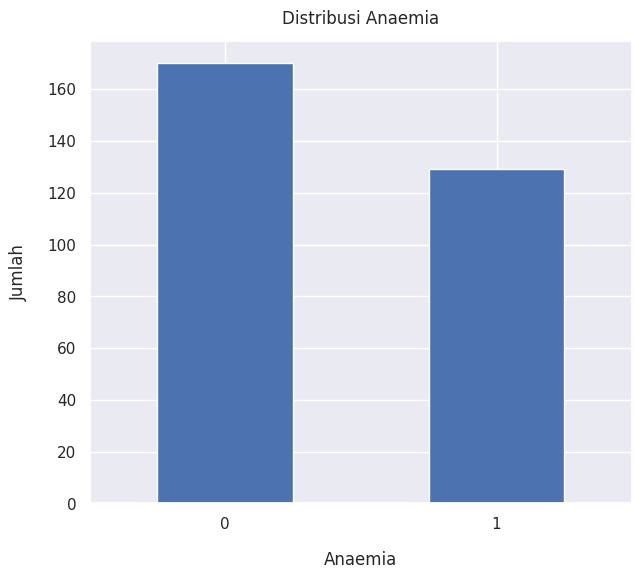

In [ ]:
# Visualisasikan fitur nominal / kategorikal misal (menggunakan countplot)
sns.set(font_scale=1.0)
df['anaemia'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)  # Changed to a valid column name like 'anaemia'
plt.xlabel("Anaemia", labelpad=14) # Changed x-axis label
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Anaemia", y=1.02); # Changed title

- Continous features

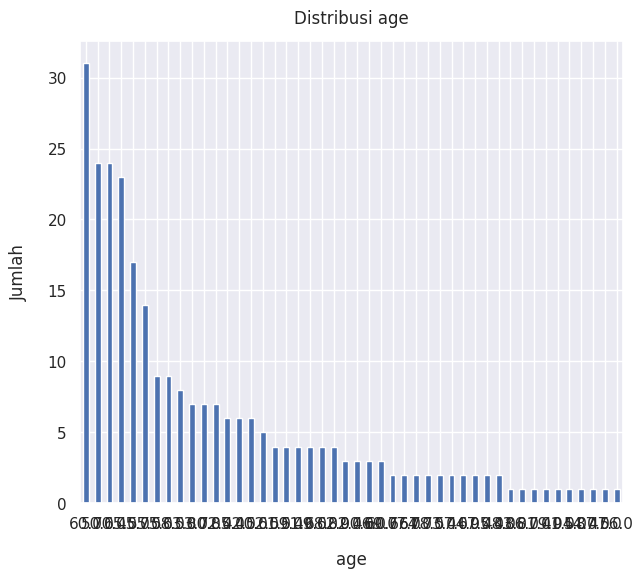

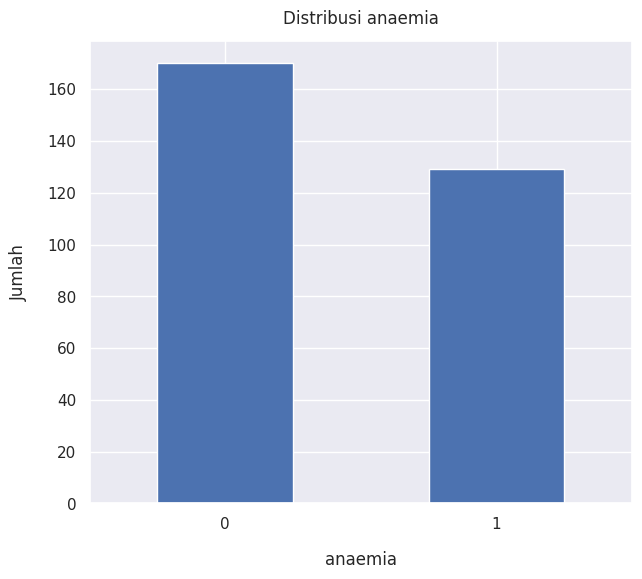

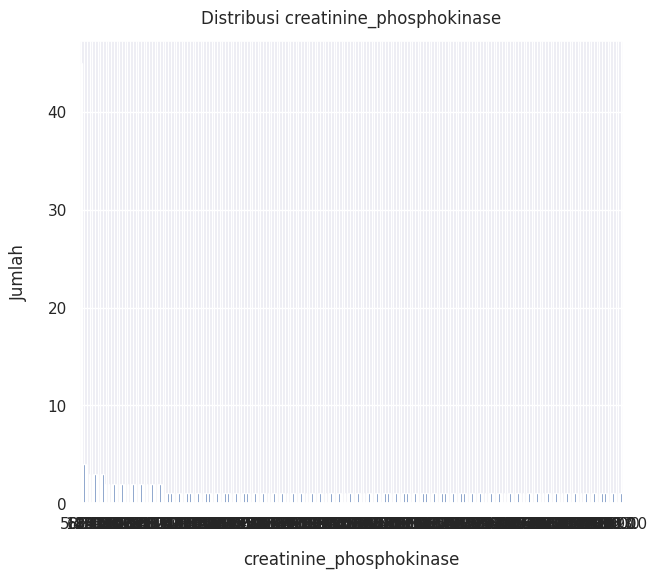

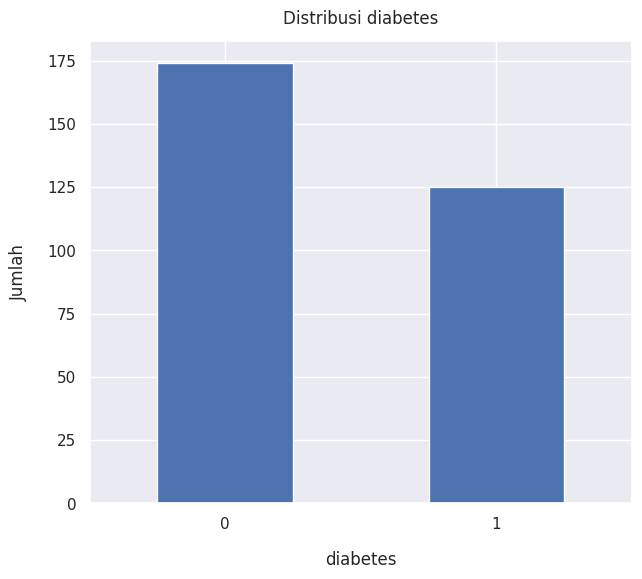

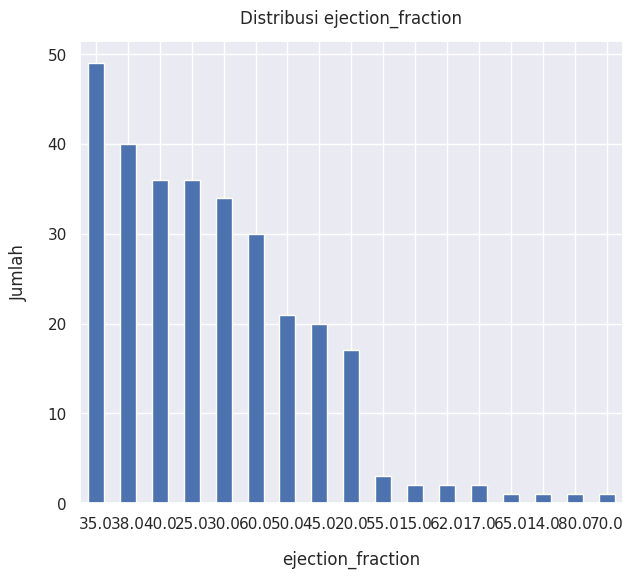

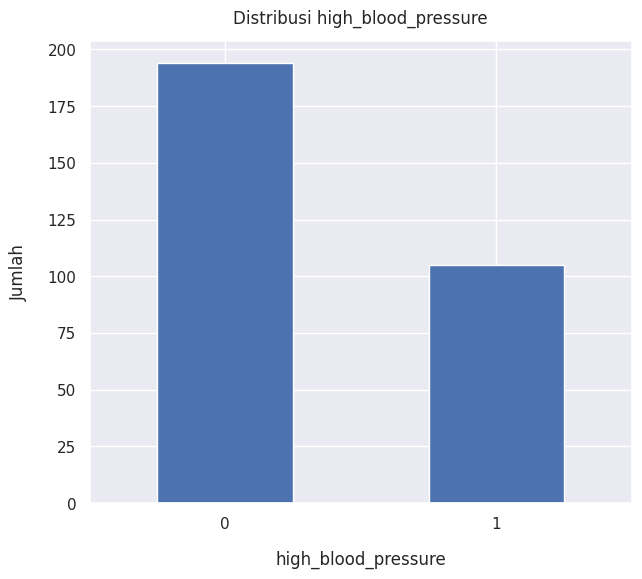

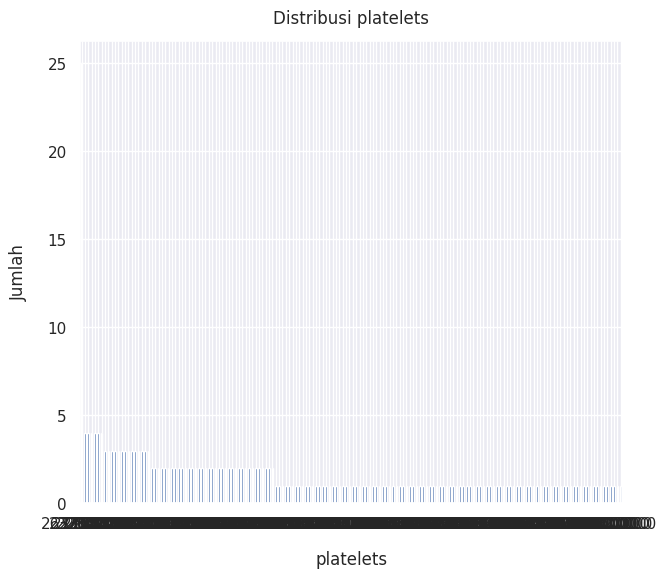

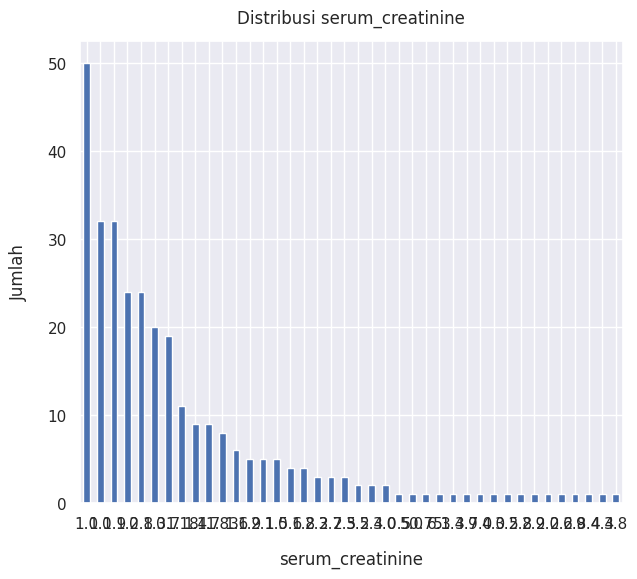

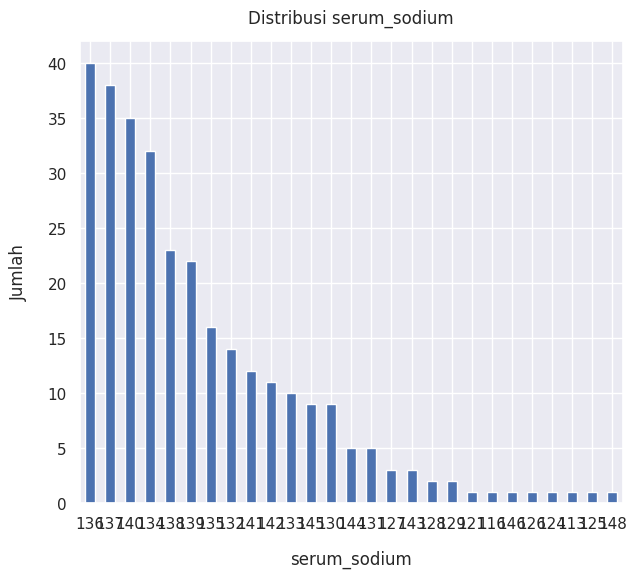

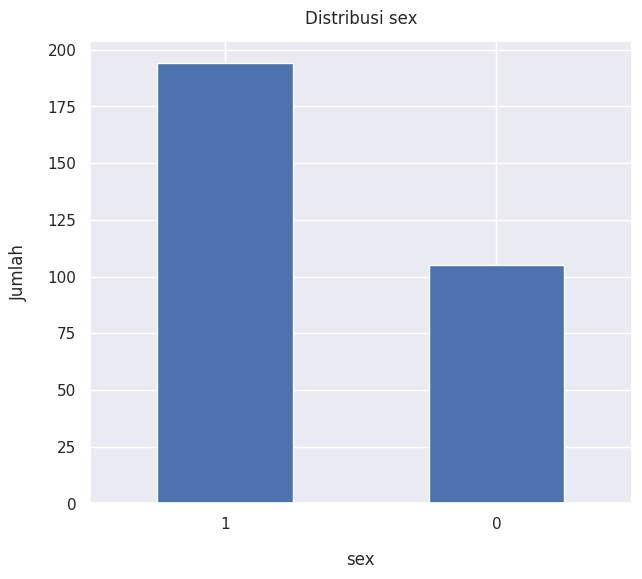

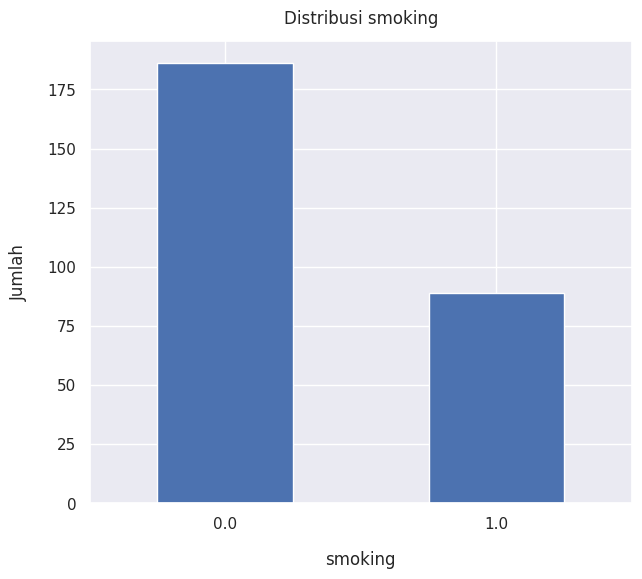

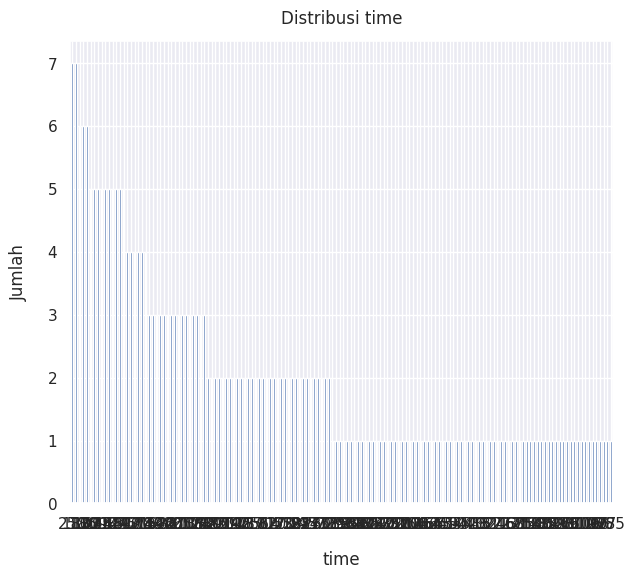

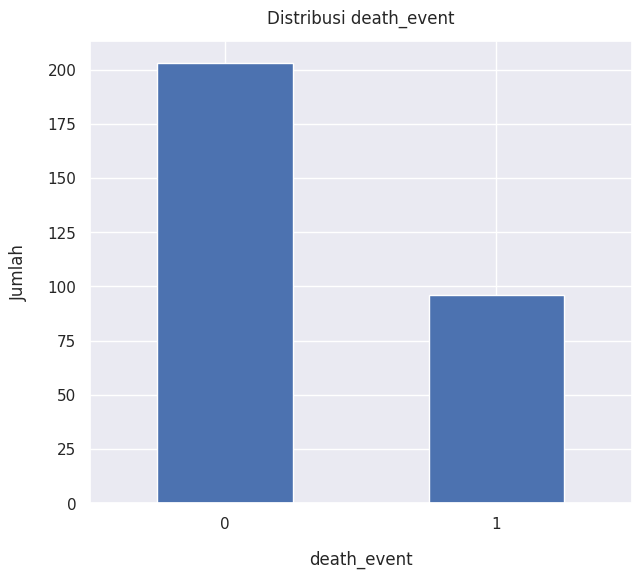

In [ ]:
# Visualisasikan fitur numerik continous (misal : histplot)
sns.set(font_scale=1.0)  # Set ukuran font untuk seaborn

for col in df.columns:
    df[col].value_counts().plot(kind='bar', rot=0, figsize=(7, 6))
    plt.xlabel(col, labelpad=14)
    plt.ylabel("Jumlah", labelpad=14)
    plt.title(f"Distribusi {col}", y=1.02)
    plt.show()

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

- Pada tahap ini, kita akan mengecek apakah terdapat data yang hilang atau tidak, terdapat duplikat atau tidak, dan apakah terdapat data yang tidak konsisten (bisa melakukan pengecekan nilai unik)

In [ ]:
# Melihat Nilai null / missing value
print("\nMemeriksa nilai yang hilang:")
print(df.isnull().sum())


Memeriksa nilai yang hilang:
age                         30
anaemia                      0
creatinine_phosphokinase    15
diabetes                     0
ejection_fraction            3
high_blood_pressure          0
platelets                   30
serum_creatinine             0
serum_sodium                 0
sex                          0
smoking                     24
time                         0
death_event                  0
dtype: int64


In [ ]:
# Menangani nilai yang hilang (jika ada)
# Dalam contoh ini, kita akan mengisi nilai yang hilang dengan median (jika ada kolom dengan missing value)
if df.isnull().sum().any():
    df.select_dtypes(include=np.number).columns
    print("Nilai yang hilang telah diisi dengan median.")

Nilai yang hilang telah diisi dengan median.


In [ ]:
# Memeriksa duplikasi
print("\nMemeriksa data duplikat:")
print(df.duplicated().sum())


Memeriksa data duplikat:
0


In [ ]:
# Melihat Data yang tidak konsisten
df['serum_creatinine'].unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

## BAB 4 – (J.62DMI00.007.1) menentukan object data

**WAJIB DIISI**,

ADA BERAPA FITUR: '13 Fitur'

ADA BERAPA RECORDS: '299'

ADA BERAPA FITUR YANG TIDAK DIGUNAKAN: '0'

TARGETNYA APA: 'Fitur	Death event (peristiwa kematian)'

ADA BERAPA MODEL DATAFRAME YANG HARUS DIBUAT?: 'ada 2'

In [ ]:
# Melihat kembali informasi dataset untuk memahami isi dan tipe data
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1                     111.0         0               20.0   
4  65.0        1                     160.0         1                NaN   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0      0.0     4            1  
1      0.0     6            1  
2      1.0     7            1  
3      0.0     7            1  
4      0.0     8            1

- Jika ada data yang tidak konsisten, silahkan di tangani pada proses dibawah ini.

In [ ]:
# jika terdapat data yang tidak konsisten
# Mengecek apakah terdapat data yang tidak konsisten
mean_value = df['serum_creatinine'].mean()
df['serum_creatinine'] = df['serum_creatinine'].replace(0, mean_value)


- Jika ada fitur yang tidak berguna, bisa dihapus pada cell dibawah ini

In [ ]:
# jika terdapar fitur yang tidak berguna

## BAB 5 – (J.62DMI00.008.1) membersihkan data
- **ANDA TIDAK PERLU MELAKUKAN OUTLIER REMOVAL** NAMUN HANDLE JIKA TERDAPAT DATA YANG KOSONG (TIDAK DIREKOMENDASIKAN MENGHAPUS), HANDLE JIKA ADA DUPLIKAT

In [ ]:
# Memastikan kembali untuk melihat data kosong
df.loc[:, df.isnull().any()].columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'smoking'],
      dtype='object')

In [ ]:
# Menampilkan Informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  284 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         296 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   275 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


In [ ]:
# Proses handle missing value
# Melihat Data duplikat
# Menghapus data duplikat jika ada
df = df.drop_duplicates()
print(f"\nJumlah data setelah menghapus duplikasi: {df.shape[0]} baris")


Jumlah data setelah menghapus duplikasi: 299 baris


In [ ]:
# Cek duplikasi data & Handle jika terdapat duplikat data
print("\nMemeriksa data duplikat:")
df.duplicated().sum()


Memeriksa data duplikat:


0

In [ ]:
duplicate_rows = df.duplicated()
print("All Duplicate Rows:")
df[df.duplicated(keep=False)]

All Duplicate Rows:


Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, death_event]
Index: []

In [ ]:
# Menghitung jumlah nilai unik untuk setiap kolom
unique_values = {}
for col in df.columns:
    unique_count = df[col].nunique()
    unique_values[col] = unique_count

for col, count in unique_values.items():
    print(f"{col:<30} : {count}")

age                            : 46
anaemia                        : 2
creatinine_phosphokinase       : 200
diabetes                       : 2
ejection_fraction              : 17
high_blood_pressure            : 2
platelets                      : 162
serum_creatinine               : 40
serum_sodium                   : 27
sex                            : 2
smoking                        : 2
time                           : 148
death_event                    : 2


- Dari pekerjaan Membersihkan Data yang telah anda lakukan, Bagaimana yang akan anda lakukan jika Dataset anda ternyata memiliki beberapa nilai kosong (missing value)?

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data
CATATAN:
- **UNTUK UJIAN INI, ANDA TIDAK PERLU MELAKUKAN FEATURE ENGINEERING DISINI**
- NAMUN ANDA WAJIB MELAKUKAN SAMPLING UNTUK BALANCING CLASS (MENYEIMBANGKAN KELAS DENGAN SKEMA OVER SAMPLING), MENUNJUKKAN OUTLIER YANG TERDAPAT PADA DATASETS, DAN MENAMPILKAN HEATMAP KORELASI ANTAR FITUR UNTUK MENGETAHUI FITUR - FITUR YANG MEMILIKI KORELASI TINGGI DAN RENDAH PADA DATASETS

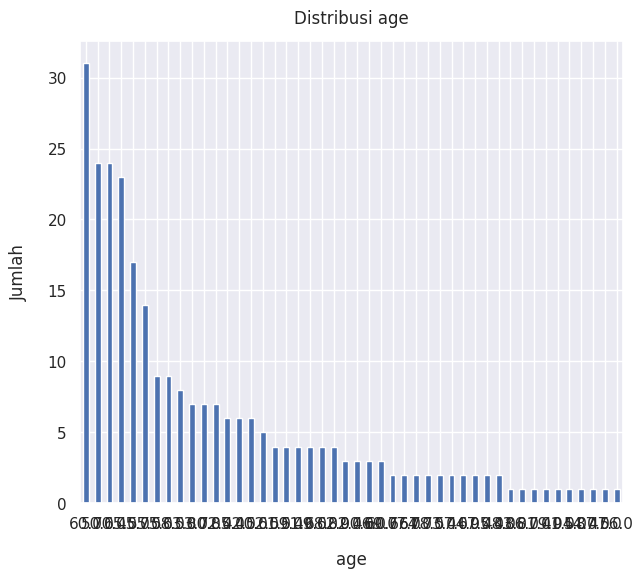

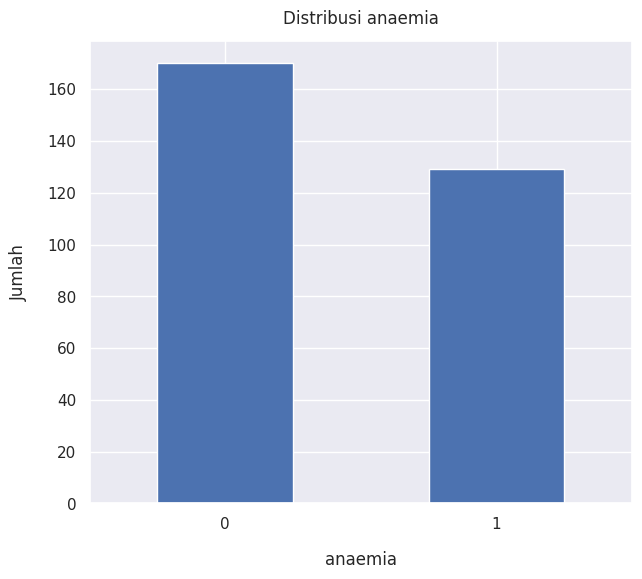

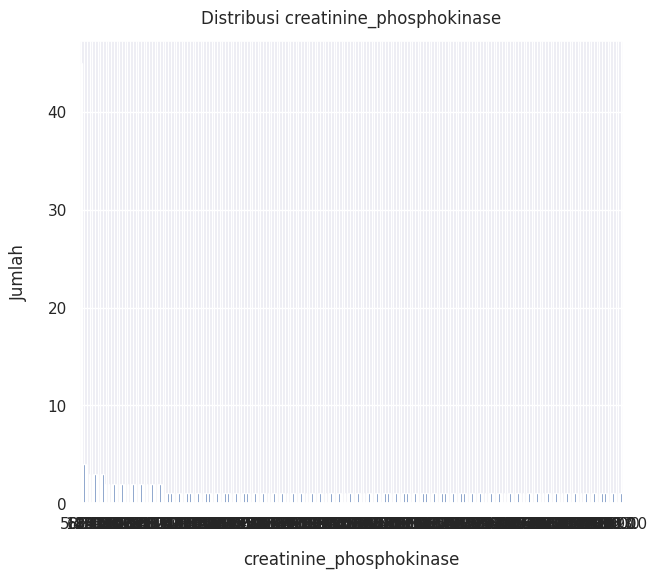

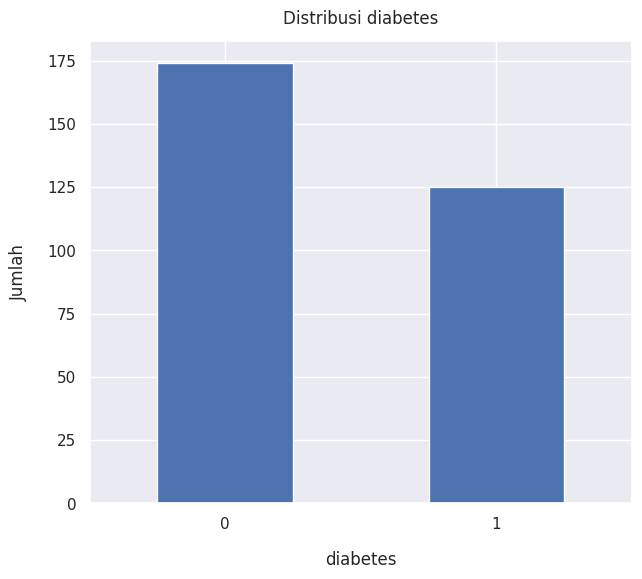

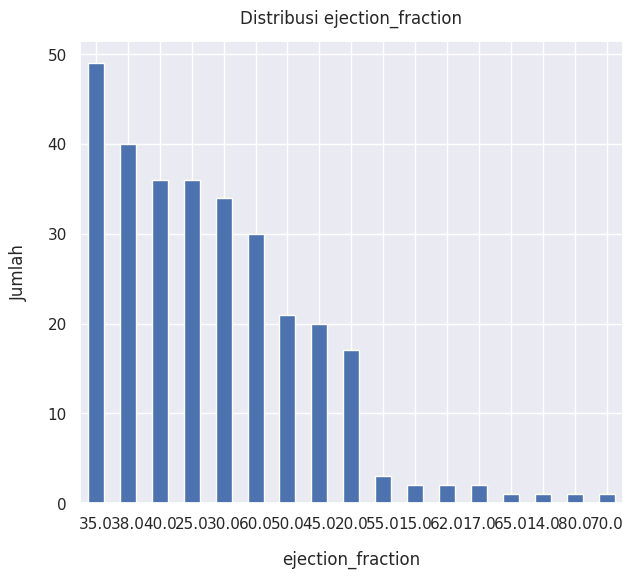

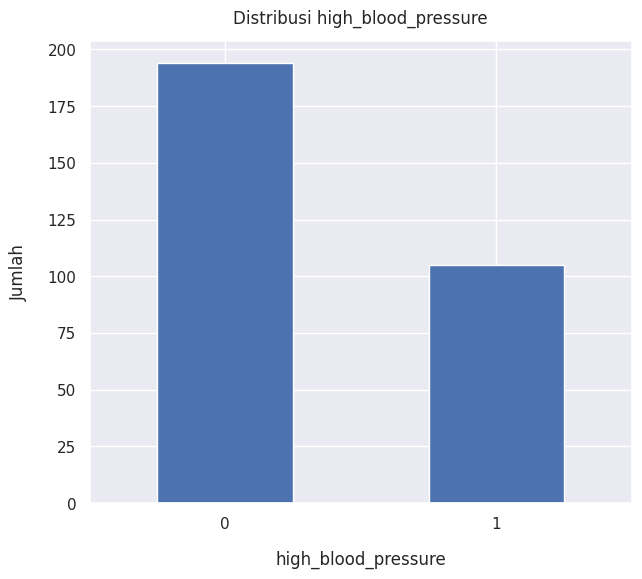

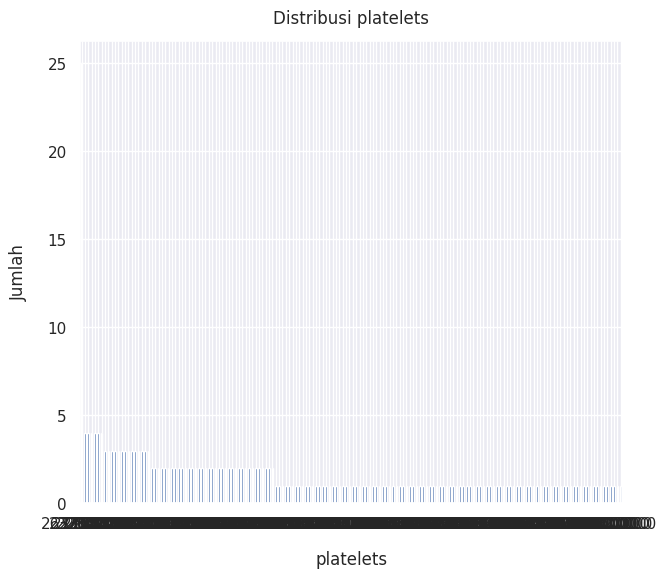

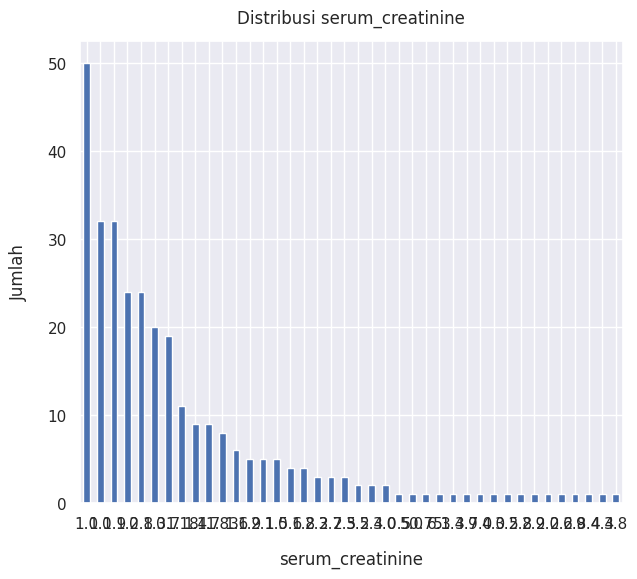

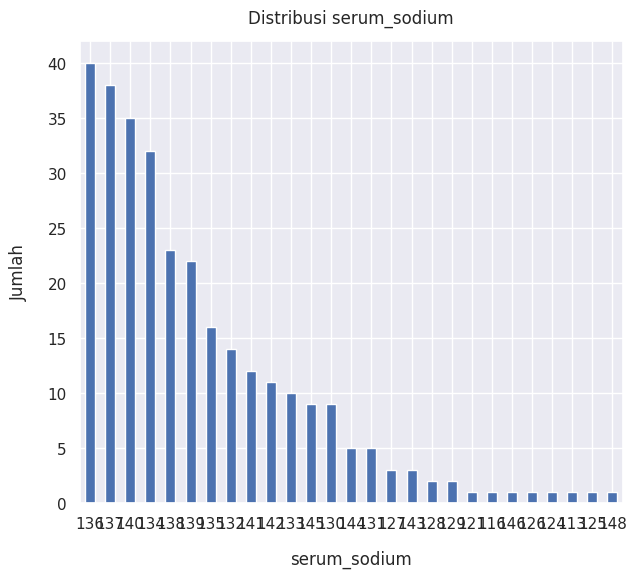

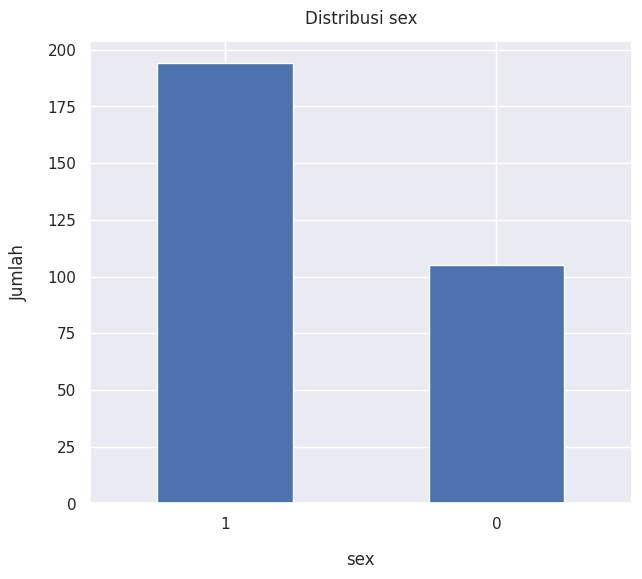

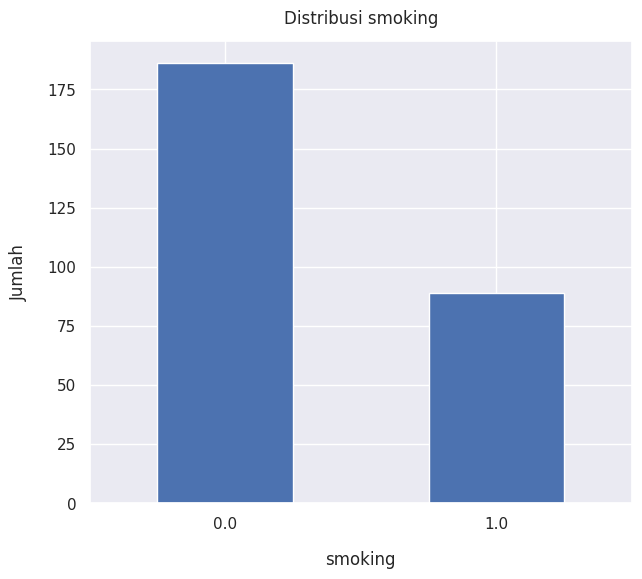

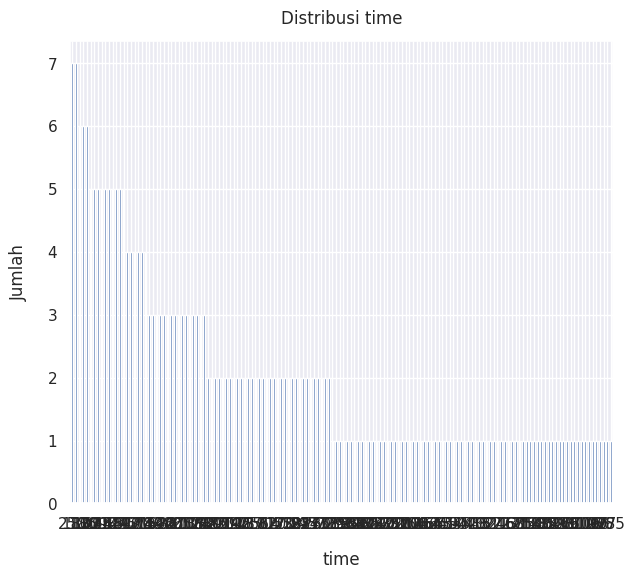

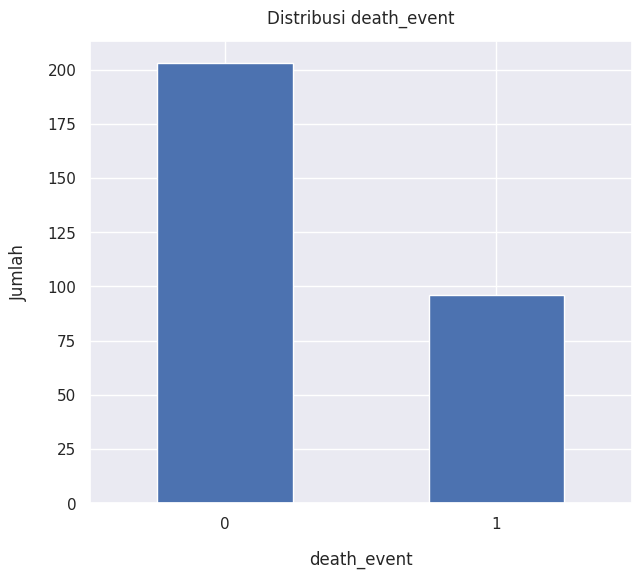

In [ ]:
# visualisasikan persebaran kelas menggunakan countplot
# print(df['FIXME'].value_counts())
# ns.countplot(data=df, x='FIXME')

sns.set(font_scale=1.0)  # Set ukuran font untuk seaborn

for col in df.columns:
    df[col].value_counts().plot(kind='bar', rot=0, figsize=(7, 6))
    plt.xlabel(col, labelpad=14)
    plt.ylabel("Jumlah", labelpad=14)
    plt.title(f"Distribusi {col}", y=1.02)
    plt.show()

In [ ]:
# karena jumlah kelas target tidak seimbang, kita akan melakukan resampling
# Import Library yang dibutuhkan
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
# karena jumlah kelas target tidak seimbang, kita akan melakukan resampling
# Import Library yang dibutuhkan
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.impute import SimpleImputer

In [ ]:
# proses resampling
X = df.drop("death_event", axis = 1)
y = df["death_event"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
!pip install imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Assuming X_train, y_train are already defined
# ... (your existing code)

# Impute missing values using SimpleImputer and replace X_train
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train) # Replace X_train with imputed data

# 1. SMOTE
# Define and apply SMOTE here
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# 2. ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

# 3. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Summarize results
print("Original dataset class distribution:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_smote.value_counts())  # Now y_smote is defined
print("\nAfter ADASYN:")
print(y_adasyn.value_counts())
print("\nAfter Random Oversampling:")
print(y_ros.value_counts())

Original dataset class distribution:
death_event
0    142
1     67
Name: count, dtype: int64

After SMOTE:
death_event
1    142
0    142
Name: count, dtype: int64

After ADASYN:
death_event
1    145
0    142
Name: count, dtype: int64

After Random Oversampling:
death_event
1    142
0    142
Name: count, dtype: int64


In [ ]:
# Menggabungkan Datasets hasil resampling
df_smote = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df_smote.columns = df.columns

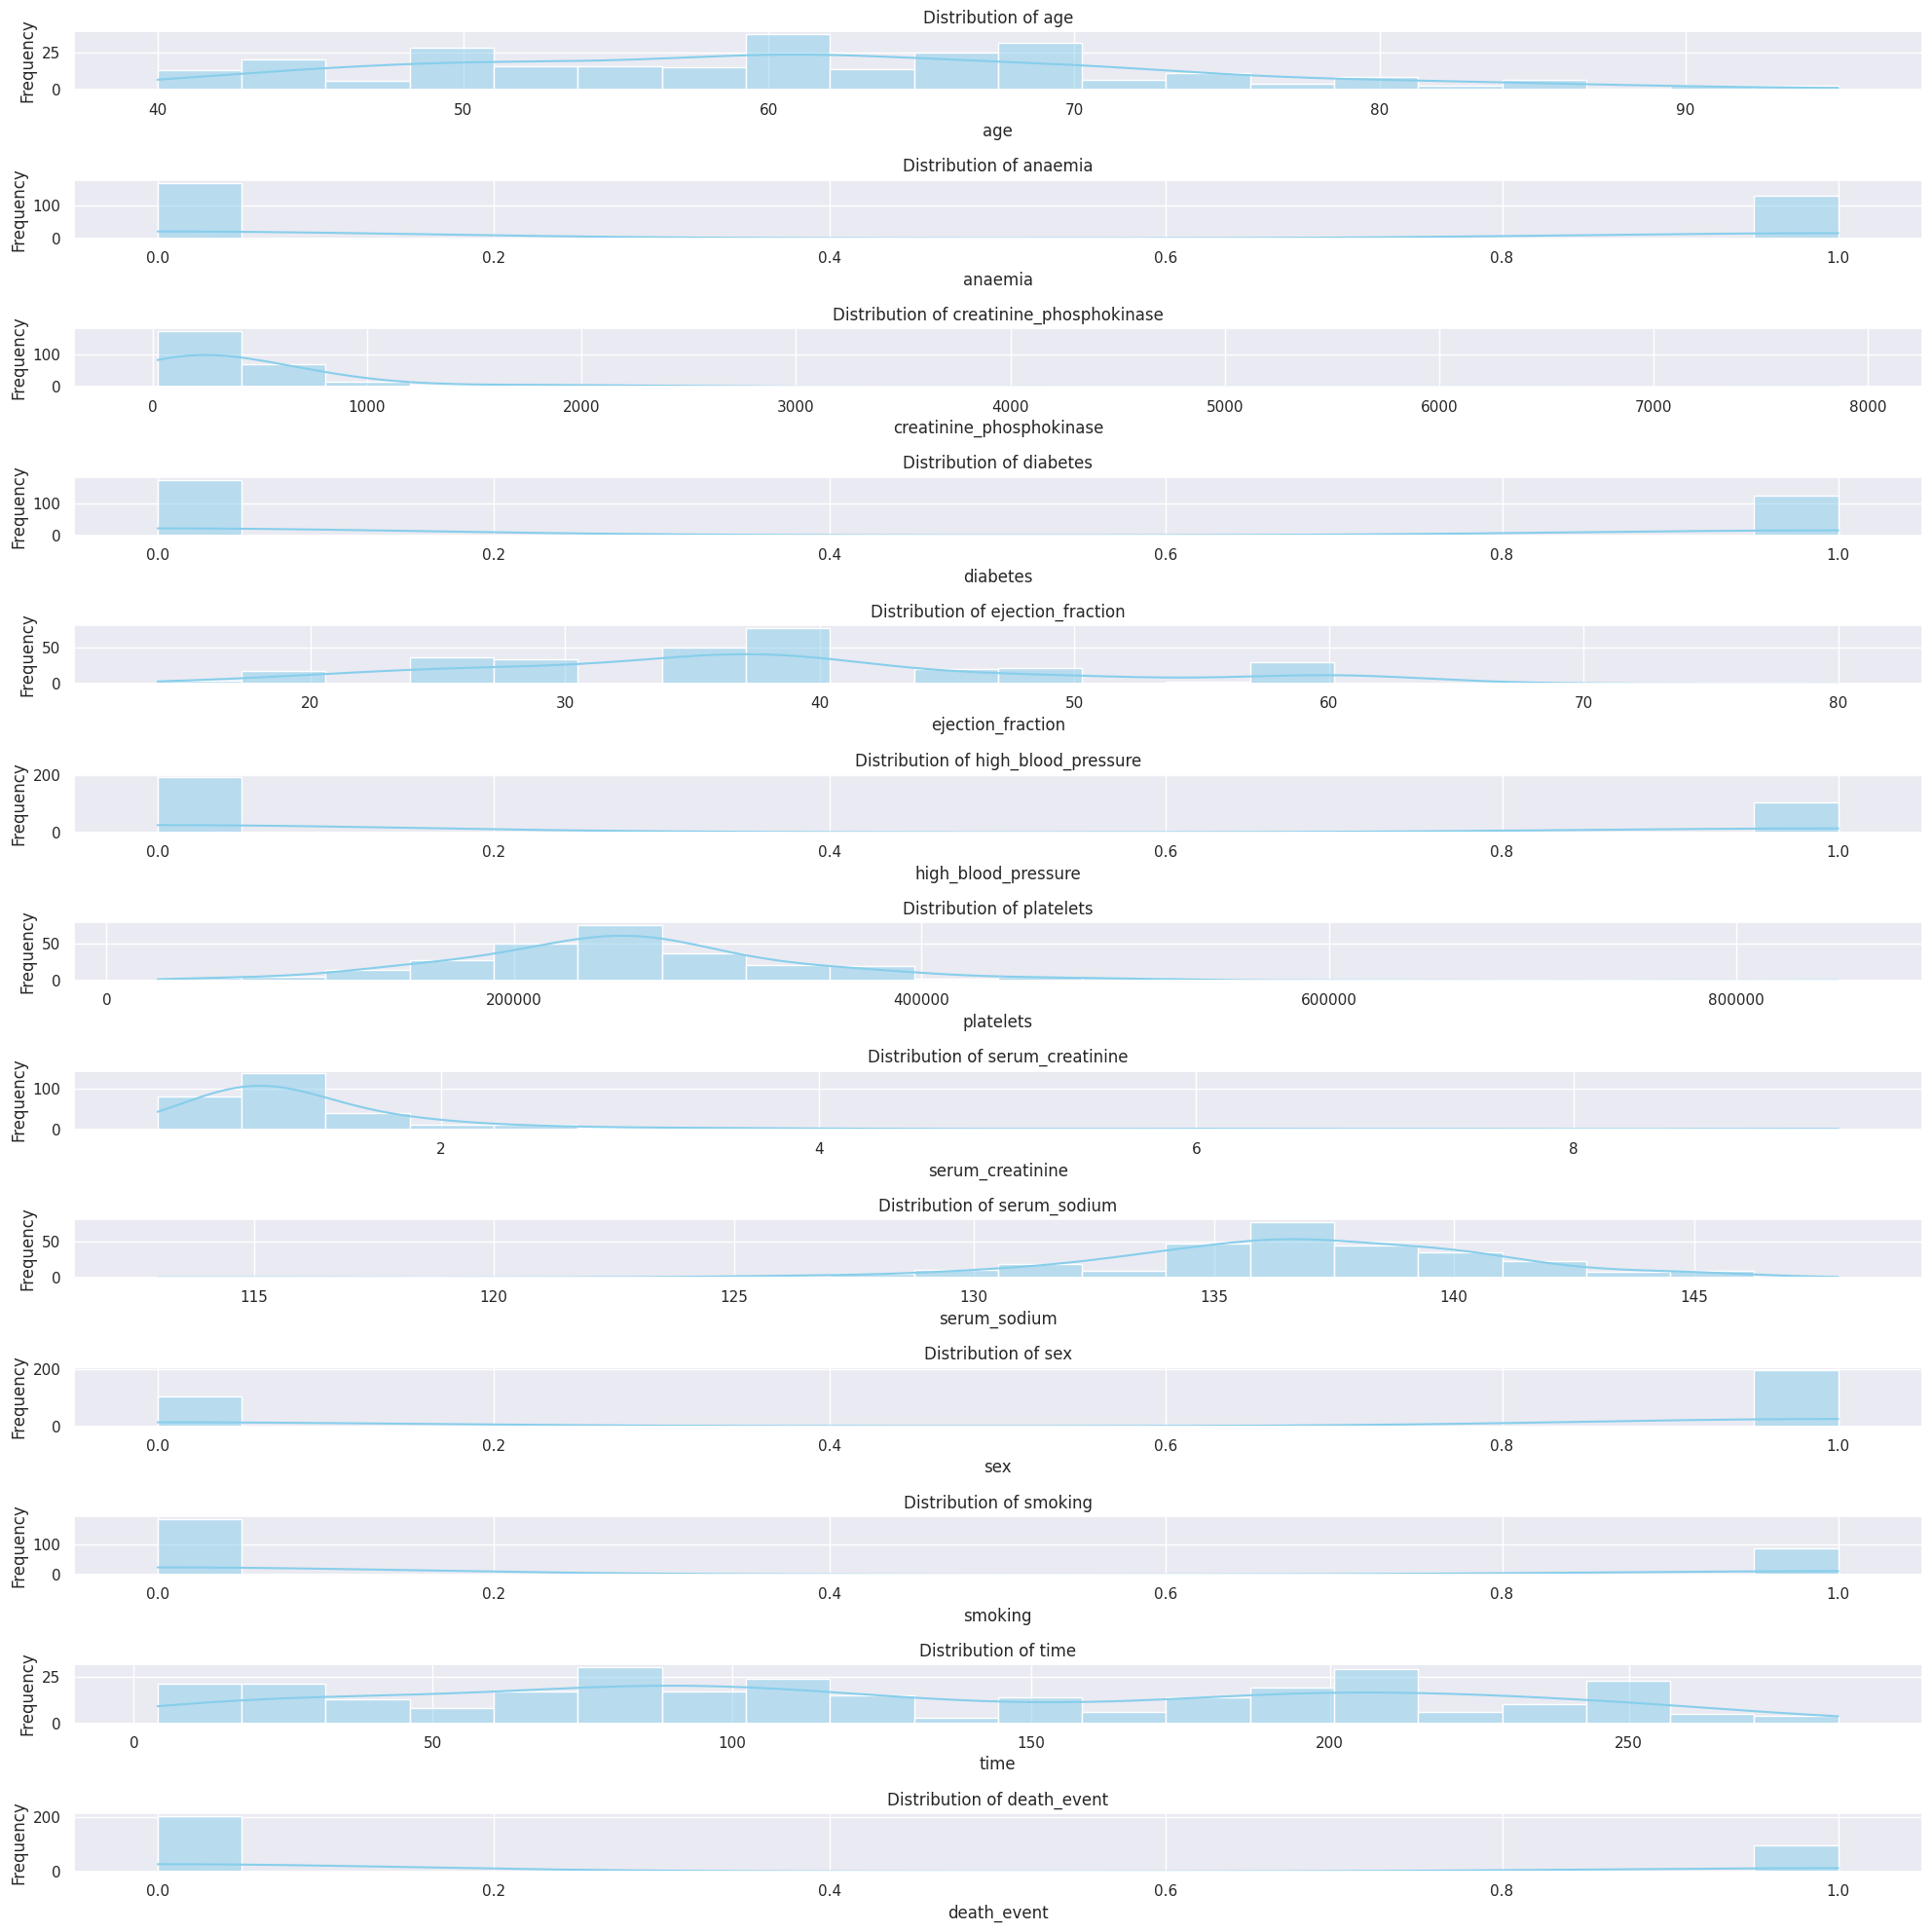

In [ ]:
# Tampilkan visualisasi persebaran kelas setelah melalui proses sampling
# Visualisasi sederhana untuk melihat distribusi data
# Periksa tipe data
numeric_columns = df.select_dtypes(include=['number']).columns  # Kolom numerik
categorical_columns = df.select_dtypes(exclude=['number']).columns  # Kolom kategori

# Tentukan ukuran figure
plt.figure(figsize=(20, 20))

# Visualisasi kolom numerik
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) + len(categorical_columns), 1, i + 1)
    sns.histplot(df[column].dropna(), kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Visualisasi kolom kategori
for i, column in enumerate(categorical_columns):
    plt.subplot(len(numeric_columns) + len(categorical_columns), 1, len(numeric_columns) + i + 1)
    sns.countplot(x=df[column], palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# cek outlier dengan visualisasi (misalnya menggunakan boxplot)
def boxplot(dataframe, numeric_columns):
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 3) // 4 #Menghitung Jumlah Baris Grafik
    fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4*num_rows)) # Membuat grid subplots dengan ukuran yang sesuai
    for i, column in enumerate(numeric_columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=dataframe[column], ax=axes[row, col]) # Iterasi Kolom Numerik untuk Membuat Boxplot
        axes[row, col].set_title(f'Boxplot of {column}')
        axes[row, col].set_ylabel(column)

    # Penentuan posisi subplot dalam grid
    for j in range(num_plots, num_rows*4):
        row = j // 4
        col = j % 4
        fig.delaxes(axes[row, col]) # Menghapus Grafik Kosong

    # Penyesuaian Layout
    plt.tight_layout()
    plt.show()

Semua kolom: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')


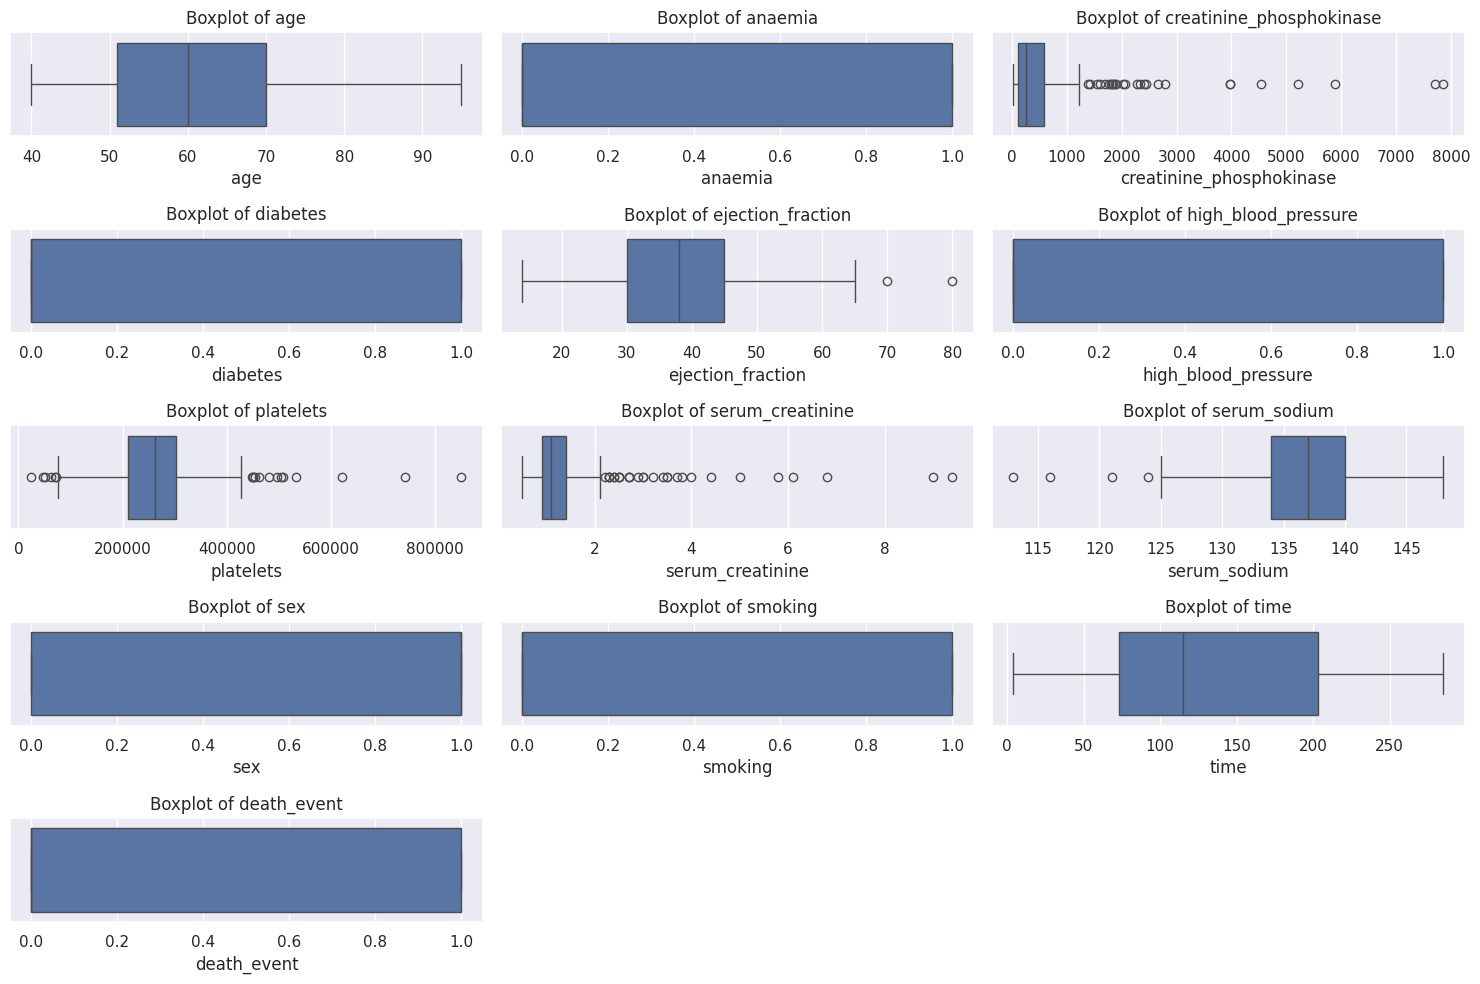

In [ ]:
# Menjalankan fungsi boxplot yang telah dijelaskan sebelumnya pada dataframe data dan kolom-kolom numerik yang ada pada num_cols

# Pilih semua kolom (termasuk non-numerik)
all_columns = df.columns
print(f"Semua kolom: {all_columns}")

# Hitung grid subplot
num_cols = 3
num_rows = int(np.ceil(len(all_columns) / num_cols))

plt.figure(figsize=(15, 10))
for i, column in enumerate(all_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    if df[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=df[column])  # Boxplot untuk numerik
    else:
        sns.boxplot(x=df[column].astype(str))  # Konversi kolom kategori ke string
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

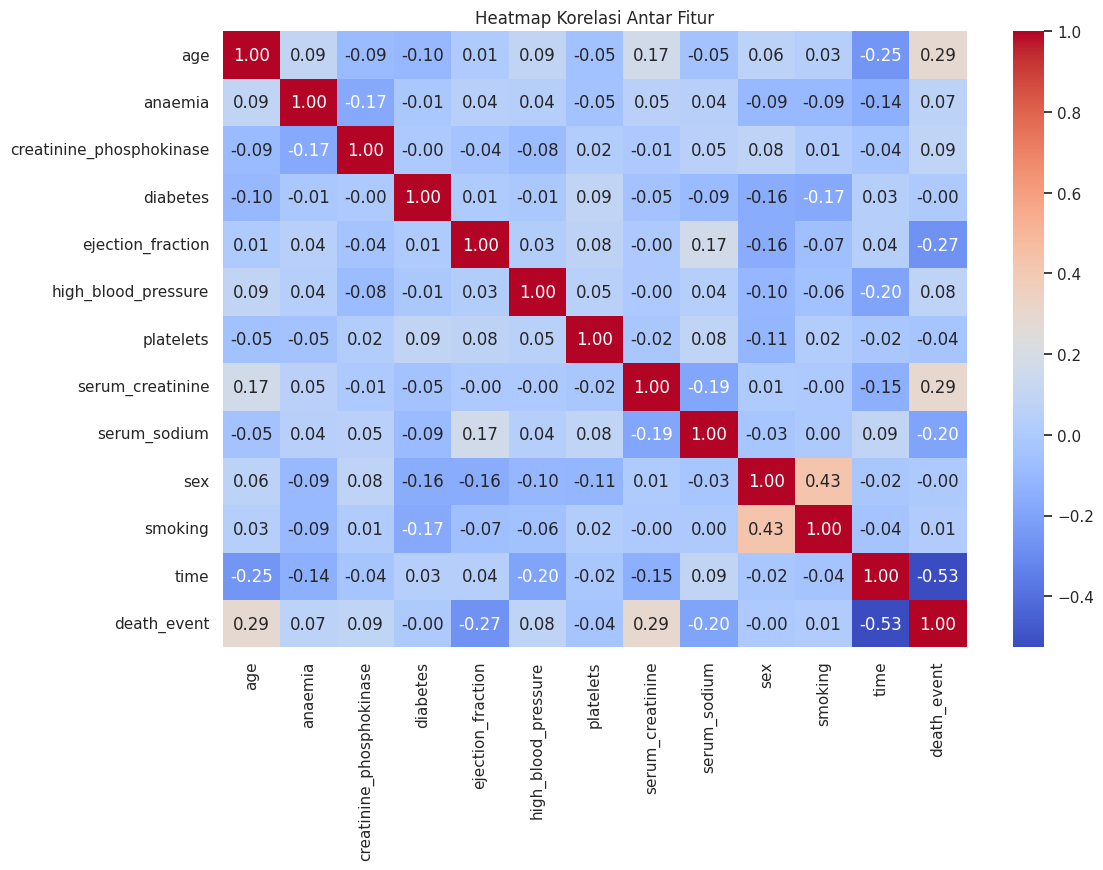

In [ ]:
# melihat korelasi antar fitur (heatmap)
# Mengecek korelasi antar fitur menggunakan heatmap

# Convert columns with string values to numeric representation
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is of object type (likely string)
        unique_values = df[column].unique()  # Get unique string values in the column
        value_mapping = {value: i for i, value in enumerate(unique_values)}  # Create a mapping from string to integer
        df[column] = df[column].map(value_mapping)  # Apply the mapping to the column

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

- DAPAT KITA LIHAT PADA HASIL KORELASI BAHWA `serum_creatinine` dan `ejection_fraction` MEMILIKI KORELASI YANG TINGGI, BAIK ITU POSITIF ATAU NEGATIF.
- PADA TAHAP SELANJUTNYA SILAHKAN BANDINGAN HASIL PEMODELAN KETIKA HANYA MENGGUNAKAN DUA KOLOM TERSEBUT () DENGAN KITA MENGGUNAKAN SEMUA KOLOM.
- SETELAH ITU JAWAB PERTANYAAN BERIKUT :    
  - DARI RATA - RATA SEMUA MODEL YANG DI BANDINGKAN (RF, KNN, DAN LOGISTIC REGRESSION) AKURASI YANG DI DAPATKAN LEBIH TINGGI YANG MENGGUNAKAN 2 FITUR SAJA ATAU SEMUA FITUR? : 'ISI DISINI'

In [ ]:
# ambil hanya 2 fitur serum_creatinine dan ejection_fraction
df_2_fitur = df_smote[['FIXME','FIXME', 'death_event']]
df_2_fitur.head()

In [ ]:
# ambil semua fitur

## BAB 7 – (J.62DMI00.010.1) menentukan label data

- Gunakan 2 nama variabel yang berbeda untuk proses splitting dataset baik untuk X,y,train,test contoh :    
  - `X_2_fitur` = Untuk menampung dataset yang akan dimodelkan menggunakan hanya 2 kolom utama.
  - `y_2_fitur` = Untuk menampung target / kelas yang akan diprediksi pada model dengan 2 kolom utama.
  - `X_2_train`,`X_2_test`, `y_2_train`, `y_2_test` = untuk menampung data yang dihasilkan `train_test_split` menggunakan `X_2_fitur` dan `y_2_fitur`

  - `X_all_fitur` = Untuk menampung semua dataset yang akan dimodelkan menggunakan.
  - `y_all_fitur` = Untuk menampung target / kelas yang akan diprediksi pada model dengan semua dataset.
  - `X_all_train`,`X_all_test`, `y_all_train`, `y_all_test` = untuk menampung data yang dihasilkan `train_test_split` menggunakan `X_all_fitur` dan `y_all_fitur`


- yang menjadi target adalah: 'isi disini'
- yang menjadi fitur adalah : 'isi disini'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
# Memisahkan target dan fitur
X = df.drop(columns="death_event")
y = df["death_event"]

In [ ]:
# Memisahkan fitur dan target dataset all fitur
X_all_fitur = X
y_all_fitur = df['death_event']

- ANDA PERLU MELAKUKAN NORMALISASI DISINI

In [ ]:
# proses normalisasi / scalling
# Inisialisasi normalizer
from sklearn.preprocessing import Normalizer # Import the Normalizer class
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

normalizer = Normalizer()
imputer = SimpleImputer(strategy='mean') # Create an imputer to replace NaNs with the mean

# Normalisasi kolom numerik, kecuali kolom target
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop("death_event")  # Exclude target column

# Impute missing values before normalization
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Hanya normalisasi kolom numerik yang bukan target
df[numeric_columns] = normalizer.fit_transform(df[numeric_columns])


# Hasil
print(df.head())

        age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.000283  0.000000                  0.002196  0.000000           0.000075   
1  0.000209  0.000000                  0.029836  0.000000           0.000144   
2  0.000401  0.000000                  0.000901  0.000000           0.000123   
3  0.000238  0.000005                  0.000529  0.000000           0.000095   
4  0.000199  0.000003                  0.000489  0.000003           0.000116   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium       sex  \
0             0.000004   0.999997          0.000007      0.000491  0.000004   
1             0.000000   0.999555          0.000004      0.000516  0.000004   
2             0.000000   0.999999          0.000008      0.000796  0.000006   
3             0.000000   1.000000          0.000009      0.000652  0.000005   
4             0.000000   1.000000          0.000008      0.000355  0.000000   

    smoking      time  death_event  
0  0.00

- LAKUKAN SPLITTING DISINI

In [ ]:
# Splitting data untuk dataset yang hanya menggunakan 2 fitur
X_2_fitur = df[['serum_creatinine', 'ejection_fraction']]
y_2_fitur = df['death_event']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_fitur, y_2_fitur, test_size=0.2, random_state=42)
X_2_train.shape, X_2_test.shape, y_2_train.shape, y_2_test.shape

((239, 2), (60, 2), (239,), (60,))

In [ ]:
# Splitting data untuk dataset yang menggunakan semua fitur
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all_fitur, y_all_fitur, test_size=0.2, random_state=42)
X_all_train.shape, X_all_test.shape, y_all_train.shape, y_all_test.shape

((239, 12), (60, 12), (239,), (60,))

- Dari pekerjaan Mengkonstruksi Data yang telah anda lakukan, bagaimana cara Anda menentukan fitur-fitur pada dataset anda perlu dinormalisasi atau tidak? : 'perlu, dikarenakan skala data yang berbeda'

## BAB 8 – (J.62DMI00.013.1) membangun model
- BANGUN MODEL DENGAN MENGGUNAKAN ALGORITMA KLASIFIKASI SEPERTI RANDOM FOREST (RF), K-NEAREST NEIGHBOUR (KNN), DAN LOGISTIC REGRESSION (LR) UNTUK KEDUA DATASET (HANYA 2 FITUR & MEMAKAI SEMUA FITUR)

In [ ]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:

features_to_compare = [
    ["serum_creatinine", "ejection_fraction"],  # Hanya 2 fitur
    X.columns.tolist()  # Semua fitur
]

results = {}

In [ ]:
 # Model yang akan dibandingkan
 models = {"Random Forest": RandomForestClassifier(random_state=42),
            "KNN": KNeighborsClassifier(),
            "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
                                        }

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

for feature_set in features_to_compare:
    feature_name = "2 Fitur" if len(feature_set) == 2 else "Semua Fitur"
    print(f"\nMenggunakan {feature_name}:")

    X_selected = X[feature_set]

    # Impute missing values before scaling
    imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
    X_selected = imputer.fit_transform(X_selected)

    # Standardisasi data (opsional, terutama untuk KNN dan Logistic Regression)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    for model_name, model in models.items():
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
        mean_accuracy = np.mean(scores)
        print(f"{model_name}: Rata-rata Akurasi = {mean_accuracy:.4f}")
        results[(feature_name, model_name)] = mean_accuracy

    # Menentukan model dan fitur terbaik
    best_combo = max(results, key=results.get)
    print(f"\nKombinasi terbaik: {best_combo[1]} dengan {best_combo[0]} (Akurasi = {results[best_combo]:.4f})")


Menggunakan 2 Fitur:
Random Forest: Rata-rata Akurasi = 0.7425
KNN: Rata-rata Akurasi = 0.6923
Logistic Regression: Rata-rata Akurasi = 0.7425

Kombinasi terbaik: Random Forest dengan 2 Fitur (Akurasi = 0.7425)

Menggunakan Semua Fitur:
Random Forest: Rata-rata Akurasi = 0.7056
KNN: Rata-rata Akurasi = 0.7256
Logistic Regression: Rata-rata Akurasi = 0.7789

Kombinasi terbaik: Logistic Regression dengan Semua Fitur (Akurasi = 0.7789)


### Random Forest

In [ ]:
rf_model_2_fitur.fit('FIXME', y_2_train)
y_rf_pred_2_fitur = rf_model_2_fitur.predict('FIXME')

# confusion matrix dan classification report
print("Random Forest Classifier 2 fitur")
print(classification_report(y_2_test, 'FIXME'))
sns.heatmap(confusion_matrix(y_2_test, 'FIXME'), annot=True, cmap='viridis')

NameError: name 'rf_model_2_fitur' is not defined

In [ ]:
rf_model_2_fitur.fit('FIXME', y_2_train)
y_rf_pred_2_fitur = rf_model_2_fitur.predict('FIXME')

# confusion matrix dan classification report
print("Random Forest Classifier 2 fitur")
print(classification_report(y_2_test, 'FIXME'))
sns.heatmap(confusion_matrix(y_2_test, 'FIXME'), annot=True, cmap='viridis')

In [ ]:
rf_model_all_fitur.fit('FIXME', y_all_train)
y_rf_pred_all_fitur = rf_model_all_fitur.predict('FIXME')

# confusion matrix dan classification report
print("Random Forest Classifier all fitur")
print(classification_report(y_all_test, 'FIXME'))
sns.heatmap(confusion_matrix(y_all_test, 'FIXME'), annot=True, cmap='viridis')

### KNN

In [ ]:
'FIXME'

In [ ]:
'FIXME'

### Logistic Regression

In [ ]:
'FIXME'

In [ ]:
'FIXME'

- Dari pekerjaan Membangun Model yang telah anda lakukan, bagaimana cara Anda meningkatkan hasil akurasi pada sebuah model? : 'ISI DISINI'

## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan
- BANDINGKAN SEMUA MODEL UNTUK MENGETAHUI MODEL MANA YANG MEMILIKI AKURASI YANG TINGGI

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Random Forest Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        35
           1       0.53      0.32      0.40        25

    accuracy                           0.60        60
   macro avg       0.58      0.56      0.55        60
weighted avg       0.59      0.60      0.57        60



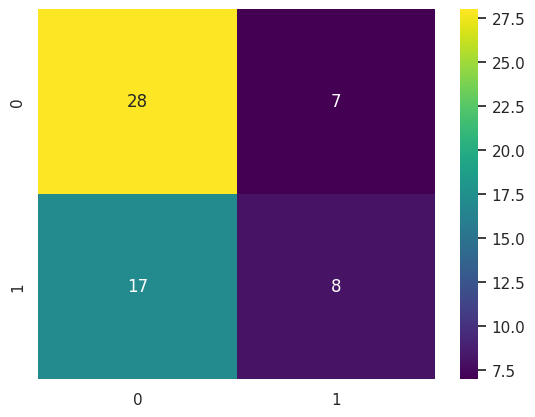

Random Forest Classifier all fitur
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



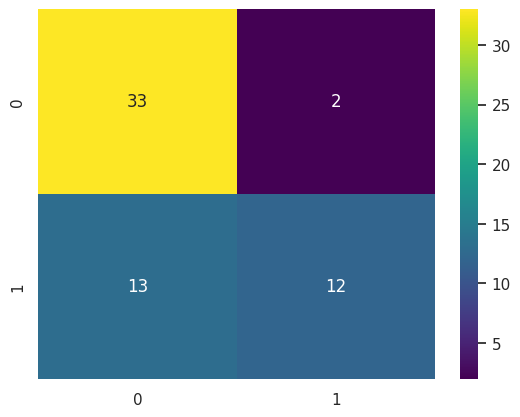

KNN Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.64      0.80      0.71        35
           1       0.56      0.36      0.44        25

    accuracy                           0.62        60
   macro avg       0.60      0.58      0.57        60
weighted avg       0.61      0.62      0.60        60



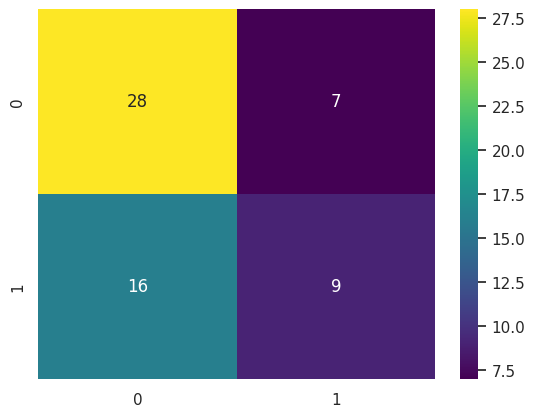

KNN Classifier all fitur
              precision    recall  f1-score   support

           0       0.54      0.80      0.64        35
           1       0.12      0.04      0.06        25

    accuracy                           0.48        60
   macro avg       0.33      0.42      0.35        60
weighted avg       0.37      0.48      0.40        60



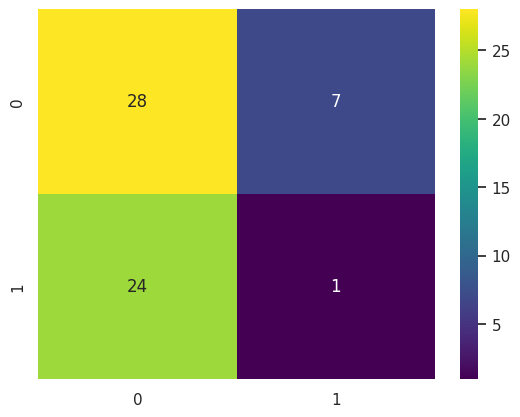

Logistic Regression Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


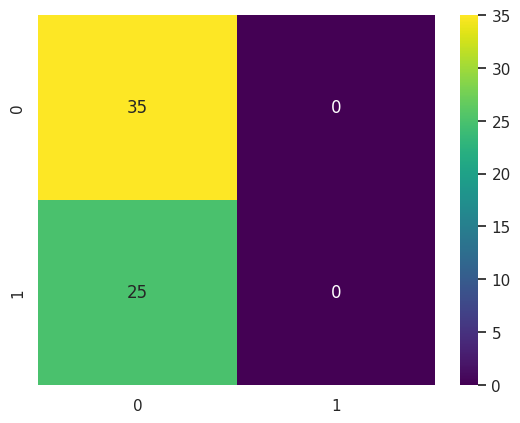

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier all fitur
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        35
           1       1.00      0.56      0.72        25

    accuracy                           0.82        60
   macro avg       0.88      0.78      0.79        60
weighted avg       0.86      0.82      0.80        60



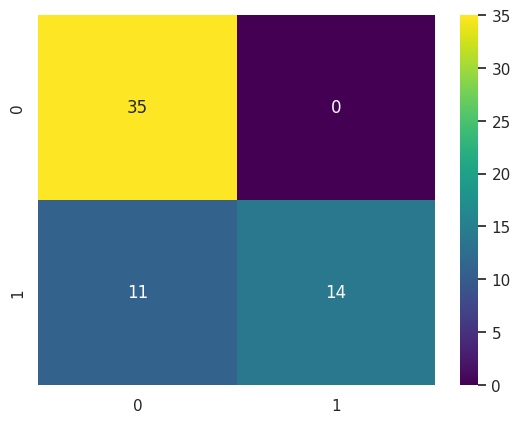

In [ ]:
# komparasi model menggunakan visualisasi
# plot komparasi akurasi dari masing -masing model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaNs with the mean
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'

# Impute missing values in X_all_train
X_all_train = imputer.fit_transform(X_all_train)

# Impute missing values in X_all_test using the same imputer fitted on X_all_train
X_all_test = imputer.transform(X_all_test)

# Now fit the KNN model (this line remains unchanged)
knn_model_all_fitur.fit(X_all_train, y_all_train)

# Now predict using the imputed X_all_test
y_knn_pred_all_fitur = knn_model_all_fitur.predict(X_all_test)

# Now fit the KNN model
knn_model_all_fitur.fit(X_all_train, y_all_train)

# Assuming rf_model_2_fitur, rf_model_all_fitur, etc., are already defined and trained
# ... (your existing model training code)


# ### Random Forest
rf_model_2_fitur = RandomForestClassifier(random_state=42)
rf_model_2_fitur.fit(X_2_train, y_2_train)
y_rf_pred_2_fitur = rf_model_2_fitur.predict(X_2_test)

# confusion matrix dan classification report
print("Random Forest Classifier 2 fitur")
print(classification_report(y_2_test, y_rf_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_rf_pred_2_fitur), annot=True, cmap='viridis')
plt.show()


rf_model_all_fitur = RandomForestClassifier(random_state=42)
rf_model_all_fitur.fit(X_all_train, y_all_train)
y_rf_pred_all_fitur = rf_model_all_fitur.predict(X_all_test)

# confusion matrix dan classification report
print("Random Forest Classifier all fitur")
print(classification_report(y_all_test, y_rf_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_rf_pred_all_fitur), annot=True, cmap='viridis')
plt.show()

# ### KNN
knn_model_2_fitur = KNeighborsClassifier()
knn_model_2_fitur.fit(X_2_train, y_2_train)
y_knn_pred_2_fitur = knn_model_2_fitur.predict(X_2_test)

print("KNN Classifier 2 fitur")
print(classification_report(y_2_test, y_knn_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_knn_pred_2_fitur), annot=True, cmap='viridis')
plt.show()

knn_model_all_fitur = KNeighborsClassifier()
knn_model_all_fitur.fit(X_all_train, y_all_train)
y_knn_pred_all_fitur = knn_model_all_fitur.predict(X_all_test)

print("KNN Classifier all fitur")
print(classification_report(y_all_test, y_knn_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_knn_pred_all_fitur), annot=True, cmap='viridis')
plt.show()

# ### Logistic Regression
lr_model_2_fitur = LogisticRegression(max_iter=200, random_state=42)
lr_model_2_fitur.fit(X_2_train, y_2_train)
y_lr_pred_2_fitur = lr_model_2_fitur.predict(X_2_test)


print("Logistic Regression Classifier 2 fitur")
print(classification_report(y_2_test, y_lr_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_lr_pred_2_fitur), annot=True, cmap='viridis')
plt.show()


lr_model_all_fitur = LogisticRegression(max_iter=200, random_state=42)
lr_model_all_fitur.fit(X_all_train, y_all_train)
y_lr_pred_all_fitur = lr_model_all_fitur.predict(X_all_test)

print("Logistic Regression Classifier all fitur")
print(classification_report(y_all_test, y_lr_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_lr_pred_all_fitur), annot=True, cmap='viridis')
plt.show()

# ... (rest of your code)

<ipython-input-98-a1f4c7363e9a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


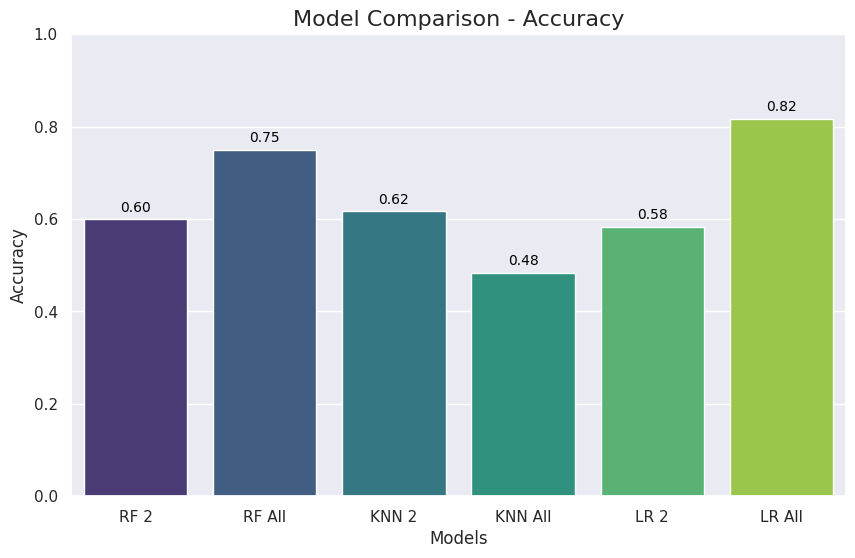

In [ ]:
# komparasi model menggunakan visualisasi
# plot komparasi akurasi dari masing -masing model

# Import accuracy_score
from sklearn.metrics import accuracy_score  # Import accuracy_score

# Removed 'RF All Opt' from models as there is no corresponding accuracy in accuracies
models = ['RF 2', 'RF All', 'KNN 2', 'KNN All', 'LR 2', 'LR All']
accuracies = [
    accuracy_score(y_2_test, y_rf_pred_2_fitur),
    accuracy_score(y_all_test, y_rf_pred_all_fitur),
    accuracy_score(y_2_test, y_knn_pred_2_fitur),
    accuracy_score(y_all_test, y_knn_pred_all_fitur),
    accuracy_score(y_2_test, y_lr_pred_2_fitur),
    accuracy_score(y_all_test, y_lr_pred_all_fitur),
    # Assuming dt_y_pred_tun is defined and calculated elsewhere in your code
    # accuracy_score(y_2_test, dt_y_pred_tun)
]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1)
plt.show()

- 3 MODEL YANG MEMILIKI AKURASI TINGGI ? : 'Rl all, RF ALL, KNN 2 fitur'
- Dari pekerjaan Mengevaluasi Hasil Pemodelan yang telah anda lakukan, bagaimana cara Anda menentukan model yang lebih akurat dan terbaik dari beberapa model yang telah anda bangun? : 'Dengan mengukur akurasi, RMSE, MSE, MAE dan setiap masing-masing model'
- Jelaskan